# Data Visualization

Setup, load data, make timeseries index, slice to the years 1998 to 2017

In [1]:
import pandas
df = pandas.read_csv('../Messstationen_Tagesdaten_v2_Datensatz_19900101_20250515.csv')
df['time'] = pandas.to_datetime(df['time'], utc=True)
df = df.set_index('time', drop=True)
df = df['1998-01-01 00:00:00': '2017-12-31 00:00:00']


In [2]:
df

,station,tlmax,tlmin,tl_mittel,rf_mittel
time,,,,,
1998-01-01 00:00:00+00:00,5925,2.2,-0.2,1.0,97.0
1998-01-02 00:00:00+00:00,5925,2.4,-0.3,1.1,97.0
1998-01-03 00:00:00+00:00,5925,9.9,0.2,5.1,70.0
1998-01-04 00:00:00+00:00,5925,11.4,7.2,9.3,56.0
1998-01-05 00:00:00+00:00,5925,10.1,6.5,8.3,52.0
...,...,...,...,...,...
2017-12-27 00:00:00+00:00,5925,10.5,0.2,5.4,75.0
2017-12-28 00:00:00+00:00,5925,10.3,3.3,6.8,75.0
2017-12-29 00:00:00+00:00,5925,3.8,1.7,2.8,64.0


We can diretcly plot columns of a dataframe

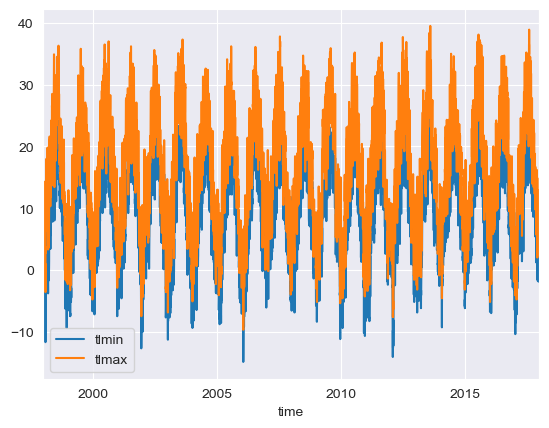

In [3]:
import matplotlib.pyplot as plt

df[['tlmin', 'tlmax']].plot()
plt.show()

Lets just plot a single year.

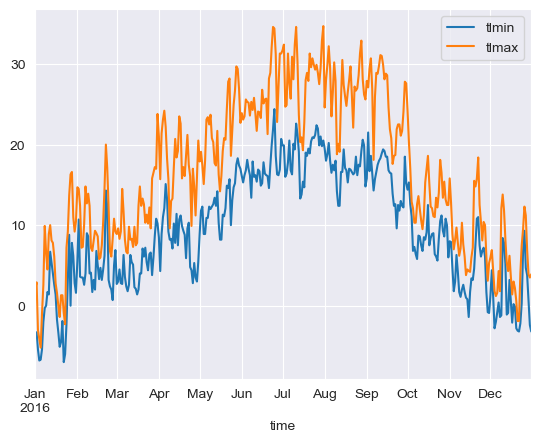

In [4]:

df['2016-01-01 00:00': '2016-12-31 00:00'][['tlmin', 'tlmax']].plot()
plt.show()

**Exercise**: Plot the yearly average temperatures.

## Pariplot

To get a better grasp for a new dataset, especially to investigate the interplay of features, you probably want to see a lot of plots.
seabor is a wrapper around matplotlib that provides additional helper methods.

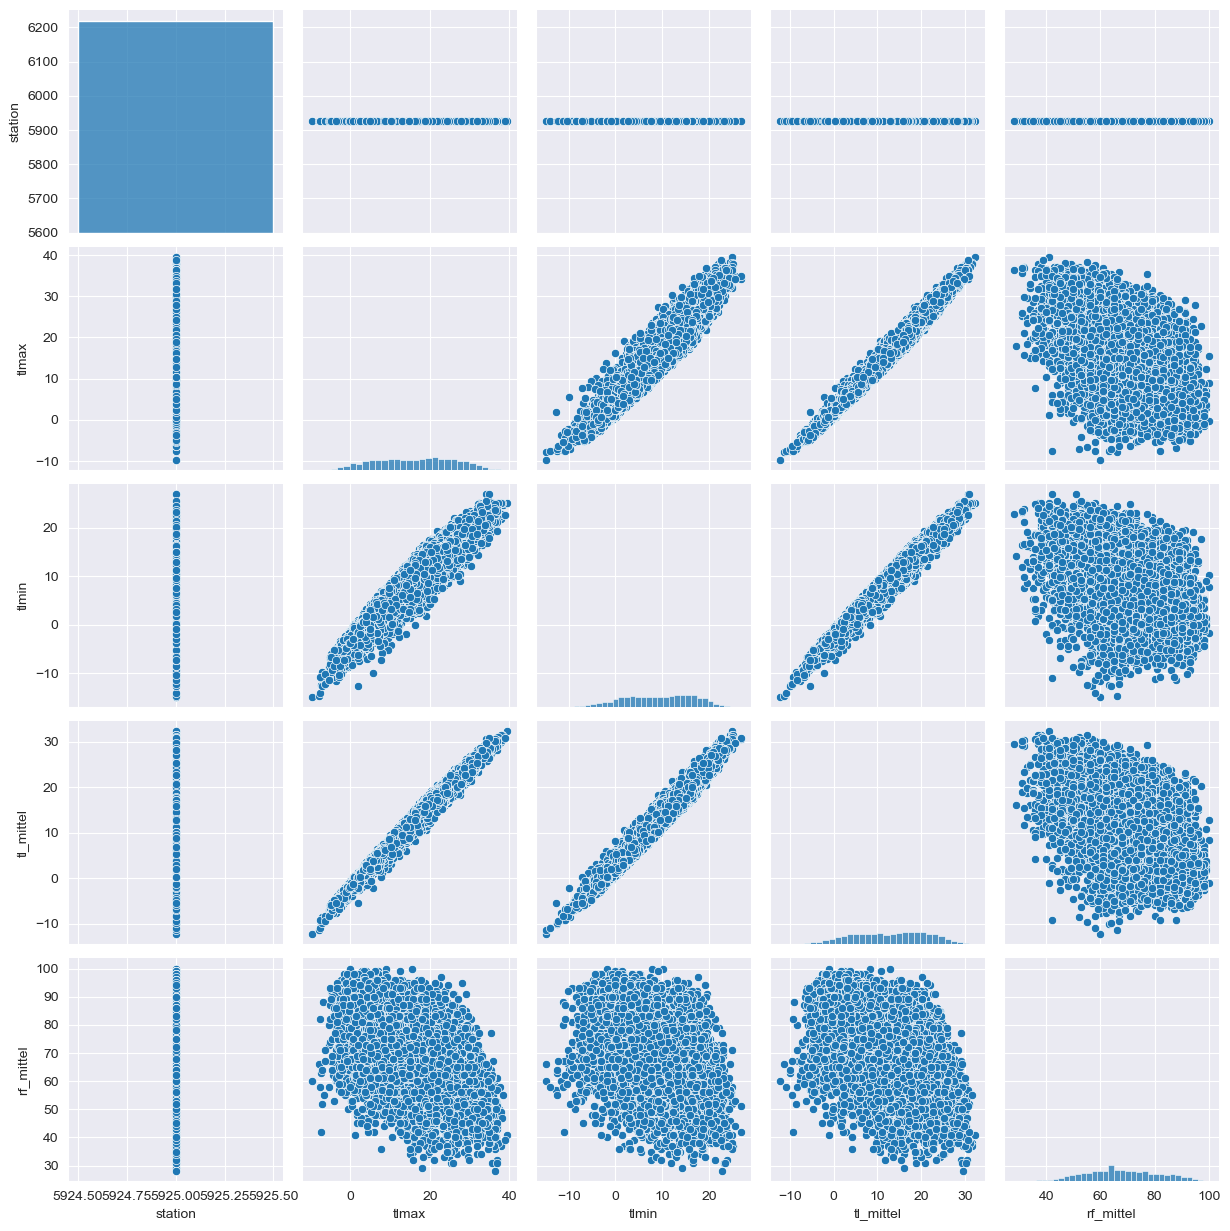

In [5]:
import seaborn as sns

sns.pairplot(df)

## Histograms

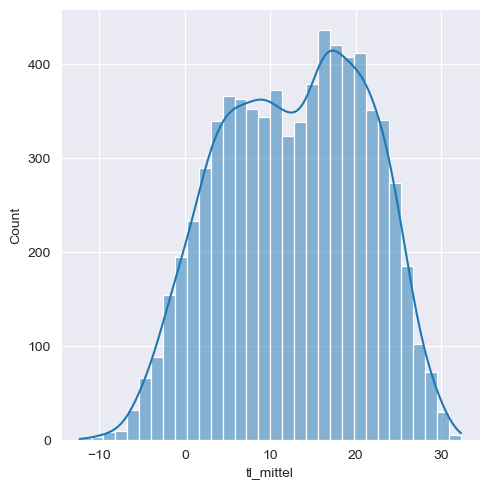

In [6]:
sns.displot(df['tl_mittel'], kde=True)
plt.show()

## Cross Correlation

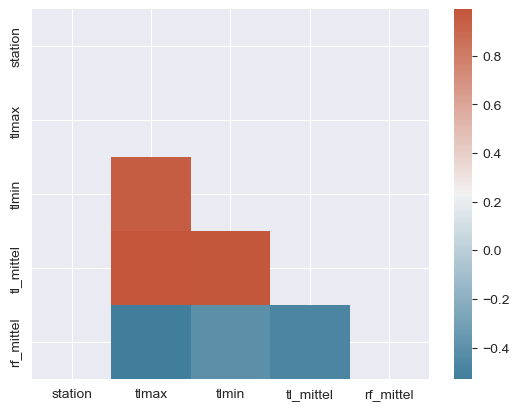

In [7]:
import numpy as np

correlations = df.corr()
mask = np.triu(np.ones_like(correlations, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlations, mask=mask, cmap=cmap)
plt.show()

## Boxplots

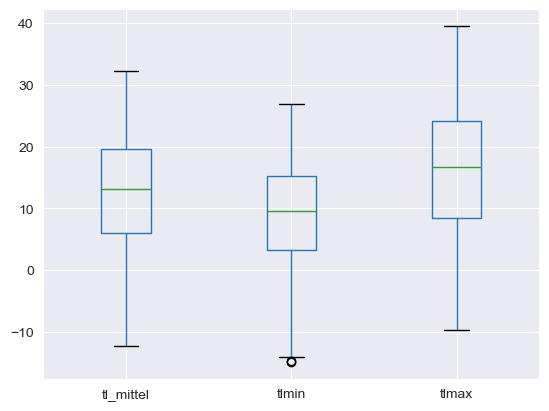

In [8]:
df[['tl_mittel', 'tlmin', 'tlmax']].boxplot()
plt.show()